In [1]:
### Libraries required

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Setting working directory
import os
os.chdir("/home/gabe/gatech/ml")

In [4]:
#Reading Data
data = pd.read_csv('covid_cdmx_sintomas.csv')
data.shape

/home/gabe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (86,88,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(708250, 93)

In [5]:
#How many columns and rows

data = data.drop(['_id','id','fechreg','origen','sector','cveentuni','entidad','delega','unidad','entresi','cventine','mpioresi','cvemuni','locresi','cvelocal','tipacien','evoluci','fecdef','semdef','intubado','digcline','hableind','ocupacio','seringre','fecingre','fecinisi','diagprob','fecvaest','tommue','labora','esmigra','paisnal','paisori','fingmex','puerperio','diaspuerp','uci','linaje','viaje1','viaje2','viaje3','viaje4','viaje5','fecinitxantivi','follabor','rango_de_edad'], axis = 1) 

data.shape

(708250, 47)

In [6]:
data["estaemba"].fillna("NO", inplace = True)
data["mesesemb"].fillna(0, inplace = True)
data["esindige"].fillna("NO", inplace = True)
data["antivira"].fillna("No especifica", inplace = True)
data["conocaso"].fillna("NO", inplace = True)
data["conanima"].fillna("NO ESPECIFICA", inplace = True)
data["vacunado"].fillna("SE IGNORA", inplace = True)
data["concerdo"].fillna("NO", inplace = True)

###

data["rectrata"].fillna("SE IGNORA", inplace = True)
data["txcrobia"].fillna("SE IGNORA", inplace = True)
data["txantivi"].fillna("SE IGNORA", inplace = True)
data["contaves"].fillna("SE IGNORA", inplace = True)
data["antipireticos"].fillna("SE IGNORA", inplace = True)






In [7]:

cols = [2,3,4,5,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]

data.drop(data.columns[cols],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708250 entries, 0 to 708249
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   sexo           708250 non-null  object
 1   edad           708250 non-null  int64 
 2   fiebre         708250 non-null  object
 3   tos            708250 non-null  object
 4   odinogia       708250 non-null  object
 5   disnea         708250 non-null  object
 6   irritabi       708250 non-null  object
 7   diarrea        708250 non-null  object
 8   dotoraci       708250 non-null  object
 9   calofrios      708250 non-null  object
 10  cefalea        708250 non-null  object
 11  mialgias       708250 non-null  object
 12  artral         708250 non-null  object
 13  ataedoge       708250 non-null  object
 14  rinorrea       708250 non-null  object
 15  polipnea       708250 non-null  object
 16  vomito         708250 non-null  object
 17  resdefin       681980 non-null  object
 18  anti

In [8]:
# Avoid droping and use columns where final result is not NA:

data = data[data['resdefin'].notna()]

In [9]:
data.shape

(681980, 19)

In [10]:
data.head()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
0,MASCULINO,62,SI,SI,NO,SI,NO,NO,SI,SI,SI,SI,NO,SI,SI,NO,NO,NEGATIVO,NO
1,MASCULINO,44,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NEGATIVO,NO
2,MASCULINO,10,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NEGATIVO,NO
3,MASCULINO,14,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO,NO
4,FEMENINO,39,NO,SI,NO,SI,NO,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,SARS-CoV-2,NO


In [11]:
data['resdefin'] = data['resdefin'].apply(lambda x: 1 if x =='SARS-CoV-2' else 0)
data = data.replace(['SI'],1)
data = data.replace(['NO'],0)
data = data.replace(['MASCULINO'],0)
data = data.replace(['FEMENINO'],1)


In [12]:
data.tail()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
708245,1,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
708246,1,54,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
708247,0,47,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
708248,1,26,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
708249,0,46,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [13]:
clean_df = data.copy()

In [14]:
clean_df = clean_df.replace(['SE IGNORA'],2)

In [15]:
clean_df.head()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
0,0,62,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0
1,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,39,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [16]:
y = clean_df[['resdefin']].copy()
y.head()

,resdefin
0,0
1,0
2,0
3,0
4,1


In [17]:
y.columns

Index(['resdefin'], dtype='object')

In [18]:
x = clean_df.drop(['resdefin'], axis=1)



In [19]:

x.columns

Index(['sexo', 'edad', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi',
       'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias', 'artral',
       'ataedoge', 'rinorrea', 'polipnea', 'vomito', 'antipireticos'],
      dtype='object')

In [20]:
y=y.astype('int')
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681980 entries, 0 to 708249
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   resdefin  681980 non-null  int64
dtypes: int64(1)
memory usage: 10.4 MB


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681980 entries, 0 to 708249
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   sexo           681980 non-null  int64
 1   edad           681980 non-null  int64
 2   fiebre         681980 non-null  int64
 3   tos            681980 non-null  int64
 4   odinogia       681980 non-null  int64
 5   disnea         681980 non-null  int64
 6   irritabi       681980 non-null  int64
 7   diarrea        681980 non-null  int64
 8   dotoraci       681980 non-null  int64
 9   calofrios      681980 non-null  int64
 10  cefalea        681980 non-null  int64
 11  mialgias       681980 non-null  int64
 12  artral         681980 non-null  int64
 13  ataedoge       681980 non-null  int64
 14  rinorrea       681980 non-null  int64
 15  polipnea       681980 non-null  int64
 16  vomito         681980 non-null  int64
 17  antipireticos  681980 non-null  int64
dtypes: int64(18)
memory usag

In [22]:
#enc_X = OneHotEncoder().fit_transform(x).toarray()

x.shape

(681980, 18)

In [23]:
#enc_y = OneHotEncoder().fit_transform(y)

In [24]:
print(y)

        resdefin
0              0
1              0
2              0
3              0
4              1
...          ...
708245         0
708246         0
708247         0
708248         0
708249         0

[681980 rows x 1 columns]


In [25]:
# Training the model

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=324)

In [35]:
#Fit the decision Tree model on the data

PositiveCOVID19 = DecisionTreeClassifier(random_state=0, max_leaf_nodes=20)



In [36]:
PositiveCOVID19 = PositiveCOVID19.fit(X_train,y_train)

[Text(708.75, 1274.0625, 'fiebre <= 0.5\ngini = 0.428\nsamples = 545584\nvalue = [376510, 169074]'),
 Text(382.5, 1104.1875, 'tos <= 0.5\ngini = 0.359\nsamples = 385607\nvalue = [295040, 90567]'),
 Text(270.0, 934.3125, 'antipireticos <= 0.5\ngini = 0.296\nsamples = 265662\nvalue = [217694, 47968]'),
 Text(225.0, 764.4375, 'rinorrea <= 0.5\ngini = 0.274\nsamples = 238376\nvalue = [199383, 38993]'),
 Text(180.0, 594.5625, 'mialgias <= 0.5\ngini = 0.256\nsamples = 213310\nvalue = [181127, 32183]'),
 Text(135.0, 424.6875, 'ataedoge <= 0.5\ngini = 0.243\nsamples = 196947\nvalue = [169045, 27902]'),
 Text(90.0, 254.8125, 'cefalea <= 0.5\ngini = 0.238\nsamples = 189143\nvalue = [163090, 26053]'),
 Text(45.0, 84.9375, 'gini = 0.228\nsamples = 162776\nvalue = [141419, 21357]'),
 Text(135.0, 84.9375, 'gini = 0.293\nsamples = 26367\nvalue = [21671, 4696]'),
 Text(180.0, 254.8125, 'gini = 0.362\nsamples = 7804\nvalue = [5955, 1849]'),
 Text(225.0, 424.6875, 'gini = 0.386\nsamples = 16363\nvalue =

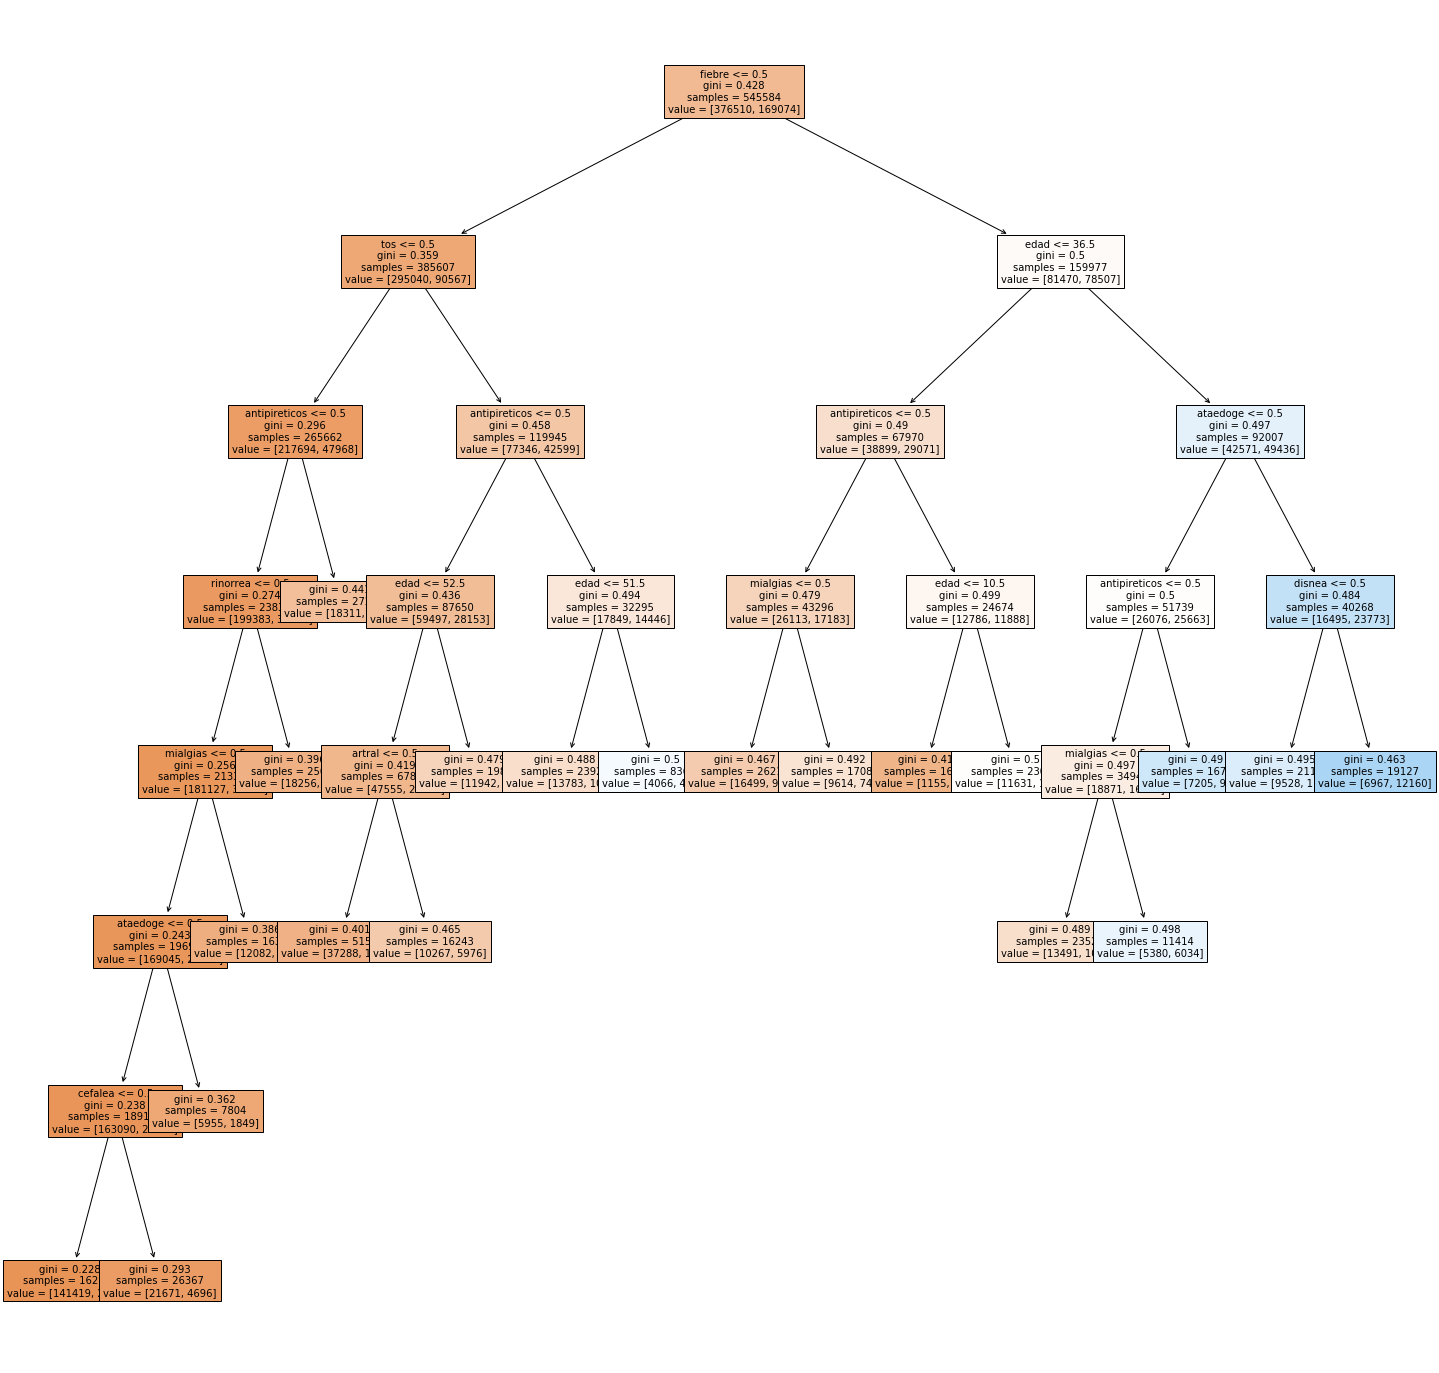

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(PositiveCOVID19, fontsize=10, filled=True, feature_names=X_train.columns)  


In [38]:
y_predicted = PositiveCOVID19.predict(X_test)

In [39]:
accuracy_score(y_test,y_predicted)*100

70.75574063755535

In [40]:
x.head()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,antipireticos
0,0,62,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0
1,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,39,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [41]:

path = PositiveCOVID19.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [42]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.027136265907575896


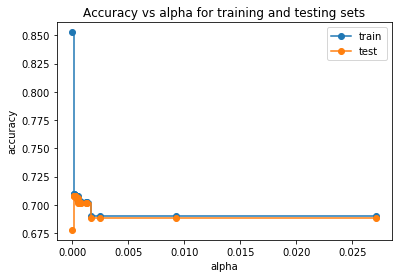

In [43]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [44]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [45]:

pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

70.19927270594447

[Text(871.875, 1223.1, 'fiebre <= 0.5\ngini = 0.428\nsamples = 545584\nvalue = [376510, 169074]'),
 Text(581.25, 951.3, 'tos <= 0.5\ngini = 0.359\nsamples = 385607\nvalue = [295040, 90567]'),
 Text(348.75, 679.5, 'antipireticos <= 0.5\ngini = 0.296\nsamples = 265662\nvalue = [217694, 47968]'),
 Text(232.5, 407.69999999999993, 'rinorrea <= 0.5\ngini = 0.274\nsamples = 238376\nvalue = [199383, 38993]'),
 Text(116.25, 135.89999999999986, 'gini = 0.256\nsamples = 213310\nvalue = [181127, 32183]'),
 Text(348.75, 135.89999999999986, 'gini = 0.396\nsamples = 25066\nvalue = [18256, 6810]'),
 Text(465.0, 407.69999999999993, 'gini = 0.441\nsamples = 27286\nvalue = [18311, 8975]'),
 Text(813.75, 679.5, 'antipireticos <= 0.5\ngini = 0.458\nsamples = 119945\nvalue = [77346, 42599]'),
 Text(697.5, 407.69999999999993, 'gini = 0.436\nsamples = 87650\nvalue = [59497, 28153]'),
 Text(930.0, 407.69999999999993, 'gini = 0.494\nsamples = 32295\nvalue = [17849, 14446]'),
 Text(1162.5, 951.3, 'edad <= 36.5\n

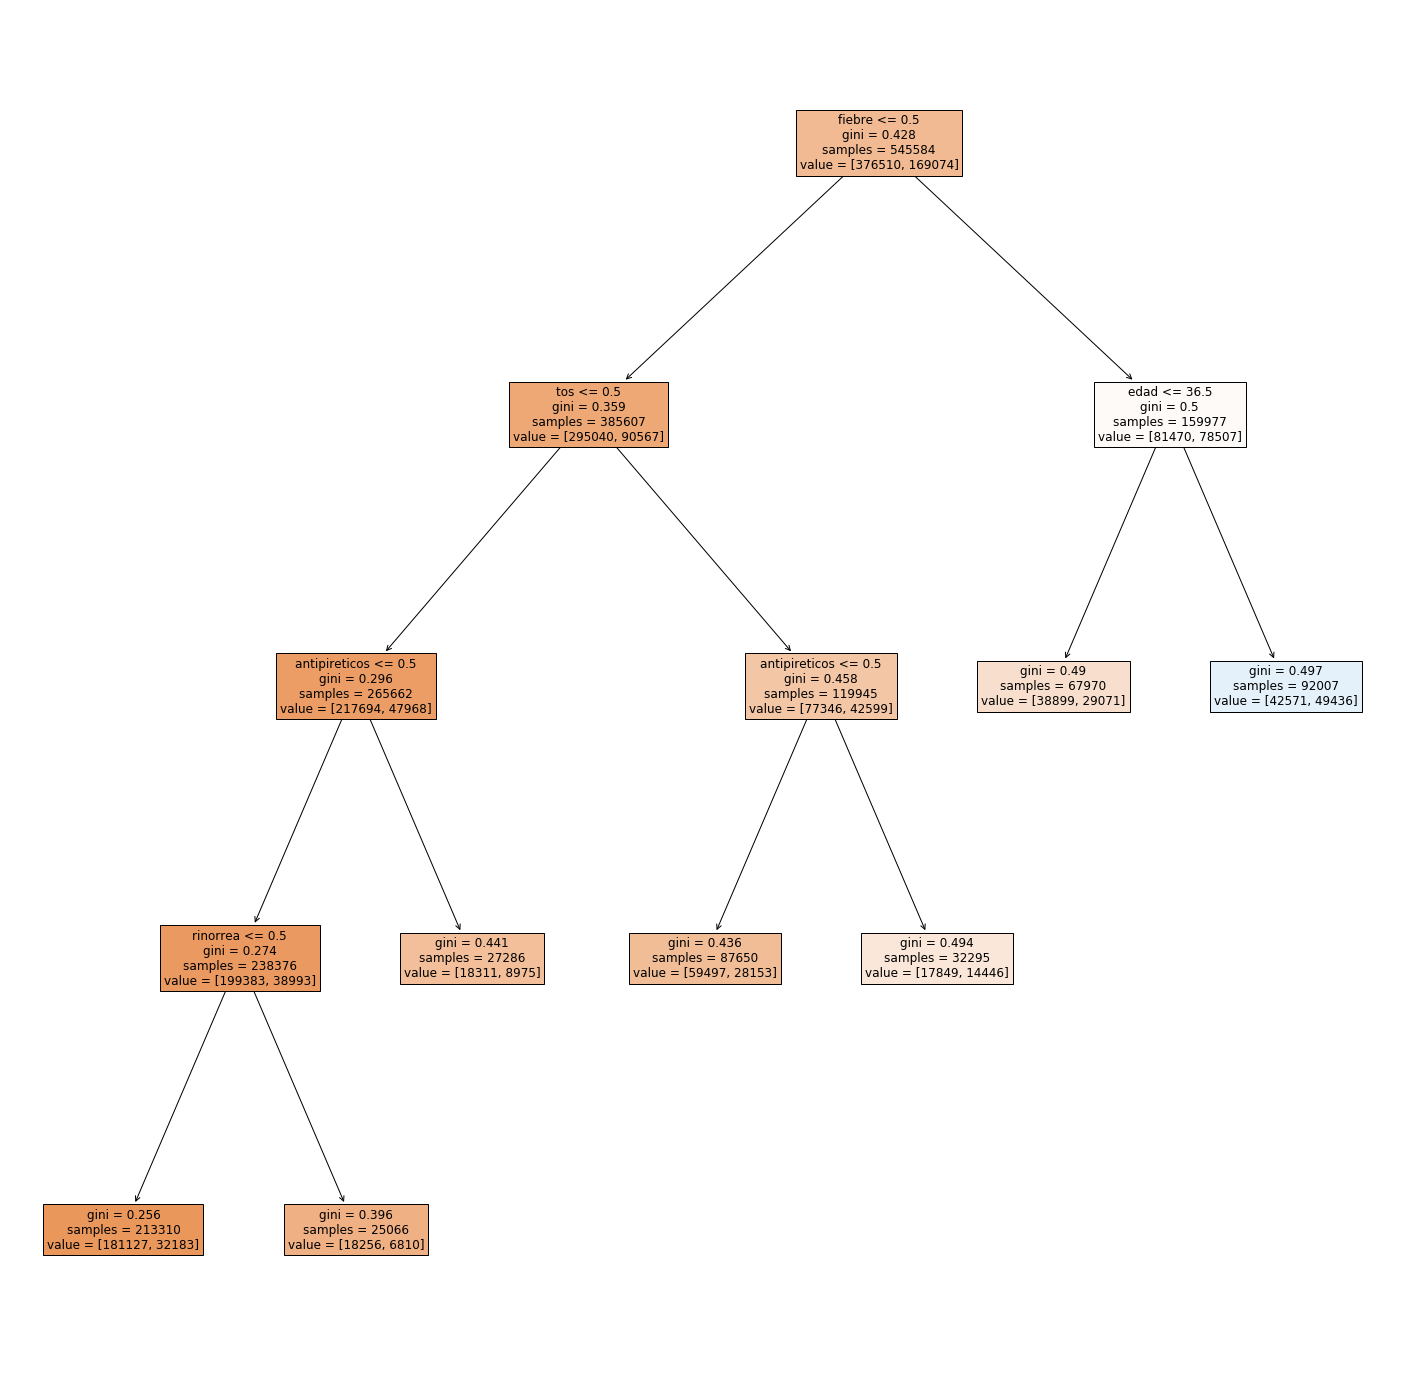

In [47]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(clf,fontsize=12, filled=True, feature_names=X_train.columns)